# Pengembangan *Machine Learning*
**memprediksi apakah terjadi inefisiensi pada klaim yang diajukan oleh fasilitas kesehatan ke BPJS Kesehatan**

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

## Data Preparation

In [27]:
sampl = pd.read_csv('sampling_healtkathon2022.csv')
sampl.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,...,184300.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,...,10628400.0,1.0,D-4-13-III,1,None,None,None,None,None,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,...,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None,0


In [28]:
sampl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11401882 entries, 0 to 11401881
Data columns (total 22 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   object 
 4   usia         int64  
 5   jenkel       object 
 6   pisat        float64
 7   tgldatang    object 
 8   tglpulang    object 
 9   jenispel     int64  
 10  politujuan   object 
 11  diagfktp     object 
 12  biaya        float64
 13  jenispulang  float64
 14  cbg          object 
 15  kelasrawat   int64  
 16  kdsa         object 
 17  kdsp         object 
 18  kdsr         object 
 19  kdsi         object 
 20  kdsd         object 
 21  label        int64  
dtypes: float64(3), int64(7), object(12)
memory usage: 1.9+ GB


In [29]:
sampl_diag = pd.read_csv('sampling_healthkathon2022_diagnosa.csv')
sampl_diag.head()

,id,diag,levelid
0,6,O06.9,1
1,57,J02.9,1
2,91,R10.1,1
3,109,R18,1
4,111,N81.3,1


In [30]:
sampl_diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17308536 entries, 0 to 17308535
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   id       int64 
 1   diag     object
 2   levelid  int64 
dtypes: int64(2), object(1)
memory usage: 396.2+ MB


In [31]:
sampl_proc = pd.read_csv('sampling_healthkathon2022_procedure.csv')
sampl_proc.head()

,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78


In [32]:
sampl_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12202871 entries, 0 to 12202870
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   proc    object
dtypes: int64(1), object(1)
memory usage: 186.2+ MB


## Data Cleansing

In [33]:
sampl.isna().sum()

id                   0
id_peserta           0
dati2                0
typefaskes           0
usia                 0
jenkel              49
pisat              190
tgldatang            0
tglpulang            0
jenispel             0
politujuan     4041455
diagfktp          2530
biaya            57815
jenispulang         39
cbg                  0
kelasrawat           0
kdsa            198670
kdsp            197007
kdsr            198459
kdsi            198463
kdsd            195181
label                0
dtype: int64

In [34]:
sampl = sampl.dropna(subset=['jenkel', 'pisat', 'politujuan', 'diagfktp', 'jenispulang'])
sampl['biaya'] = sampl['biaya'].fillna(sampl['biaya'].mean())
sampl['kdsa'] = sampl['kdsa'].fillna('None')
sampl['kdsp'] = sampl['kdsp'].fillna('None')
sampl['kdsr'] = sampl['kdsr'].fillna('None')
sampl['kdsi'] = sampl['kdsi'].fillna('None')
sampl['kdsd'] = sampl['kdsd'].fillna('None')

In [35]:
sampl.isna().sum()

id             0
id_peserta     0
dati2          0
typefaskes     0
usia           0
jenkel         0
pisat          0
tgldatang      0
tglpulang      0
jenispel       0
politujuan     0
diagfktp       0
biaya          0
jenispulang    0
cbg            0
kelasrawat     0
kdsa           0
kdsp           0
kdsr           0
kdsi           0
kdsd           0
label          0
dtype: int64

In [36]:
sampl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357672 entries, 0 to 11401848
Data columns (total 22 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   object 
 4   usia         int64  
 5   jenkel       object 
 6   pisat        float64
 7   tgldatang    object 
 8   tglpulang    object 
 9   jenispel     int64  
 10  politujuan   object 
 11  diagfktp     object 
 12  biaya        float64
 13  jenispulang  float64
 14  cbg          object 
 15  kelasrawat   int64  
 16  kdsa         object 
 17  kdsp         object 
 18  kdsr         object 
 19  kdsi         object 
 20  kdsd         object 
 21  label        int64  
dtypes: float64(3), int64(7), object(12)
memory usage: 1.3+ GB


In [37]:
sampl_diag.isna().sum()

id         0
diag       0
levelid    0
dtype: int64

In [38]:
sampl_proc.isna().sum()

id      0
proc    0
dtype: int64

## Exploratory Data Analysis

## Features Engineering

In [39]:
sampl_1 = sampl.merge(sampl_diag, left_on = "id", right_on = "id")
sampl_1.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,diag,levelid
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,...,Q-5-42-0,3,None,None,None,None,None,0,H60.9,1
1,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,Q-5-44-0,3,None,None,None,None,None,0,K30,2
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,Q-5-44-0,3,None,None,None,None,None,0,L80,2
3,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,Q-5-44-0,3,None,None,None,None,None,0,E11.9,1
4,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,...,Q-5-44-0,3,None,None,None,None,None,0,H52.0,2


In [40]:
sampling = sampl_1.merge(sampl_proc, left_on = "id", right_on = "id")
sampling.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,diag,levelid,proc
0,143197,736,17,KI,46,P,1.0,2020-04-19T17:00:00.000Z,2020-04-19T17:00:00.000Z,2,...,3,None,None,None,None,None,0,A09.9,1,99.18
1,1057379,751,17,B,60,L,1.0,2019-10-08T17:00:00.000Z,2019-10-08T17:00:00.000Z,2,...,3,None,None,None,None,None,0,K04.1,1,87.12
2,1052148,1123,17,B,15,L,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,M25.6,1,93.34
3,1052148,1123,17,B,15,L,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,M25.6,1,93.35
4,998994,1289,17,A,37,P,1.0,2019-02-11T17:00:00.000Z,2019-02-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,J45.9,1,93.94


In [41]:
sampling['label'].value_counts()

0    6230823
1      93653
Name: label, dtype: int64

In [42]:
labelencoder = LabelEncoder()
sampling['jenkel'] = labelencoder.fit_transform(sampling['jenkel'])
sampling.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,diag,levelid,proc
0,143197,736,17,KI,46,1,1.0,2020-04-19T17:00:00.000Z,2020-04-19T17:00:00.000Z,2,...,3,None,None,None,None,None,0,A09.9,1,99.18
1,1057379,751,17,B,60,0,1.0,2019-10-08T17:00:00.000Z,2019-10-08T17:00:00.000Z,2,...,3,None,None,None,None,None,0,K04.1,1,87.12
2,1052148,1123,17,B,15,0,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,M25.6,1,93.34
3,1052148,1123,17,B,15,0,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,M25.6,1,93.35
4,998994,1289,17,A,37,1,1.0,2019-02-11T17:00:00.000Z,2019-02-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,J45.9,1,93.94


In [43]:
sampling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324476 entries, 0 to 6324475
Data columns (total 25 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   object 
 4   usia         int64  
 5   jenkel       int32  
 6   pisat        float64
 7   tgldatang    object 
 8   tglpulang    object 
 9   jenispel     int64  
 10  politujuan   object 
 11  diagfktp     object 
 12  biaya        float64
 13  jenispulang  float64
 14  cbg          object 
 15  kelasrawat   int64  
 16  kdsa         object 
 17  kdsp         object 
 18  kdsr         object 
 19  kdsi         object 
 20  kdsd         object 
 21  label        int64  
 22  diag         object 
 23  levelid      int64  
 24  proc         object 
dtypes: float64(3), int32(1), int64(8), object(13)
memory usage: 1.2+ GB


In [47]:
sampling['proc'].unique()

array(['99.18', '87.12', '93.34', ..., '49.92', '87.33', '63.81'],
      dtype=object)

In [48]:
sampling['proc'] = pd.to_numeric(sampling['proc'], errors='coerce')

In [49]:
sampling[sampling['proc'].isnull()]

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,diag,levelid,proc
35,997642,2566,17,A,71,0,1.0,2018-02-12T17:00:00.000Z,2018-02-12T17:00:00.000Z,2,...,3,None,None,None,None,None,0,J44.9,2,NaN
36,997642,2566,17,A,71,0,1.0,2018-02-12T17:00:00.000Z,2018-02-12T17:00:00.000Z,2,...,3,None,None,None,None,None,0,Z09.8,1,NaN
56,998271,7900,17,A,63,1,1.0,2018-02-25T17:00:00.000Z,2018-02-25T17:00:00.000Z,2,...,3,None,None,None,None,None,0,E11.9,1,NaN
62,996926,8484,17,A,61,0,1.0,2018-01-31T17:00:00.000Z,2018-01-31T17:00:00.000Z,2,...,3,None,None,None,None,None,0,L02.8,1,NaN
80,997435,11279,17,A,64,0,1.0,2018-02-08T17:00:00.000Z,2018-02-08T17:00:00.000Z,2,...,3,None,None,None,None,None,0,K30,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316823,9027197,7088570,217,B,3,1,4.0,2018-02-13T17:00:00.000Z,2018-02-13T17:00:00.000Z,2,...,3,None,None,None,None,None,0,Q65.8,1,NaN
6316853,8535732,7094363,150,KJ,4,0,4.0,2018-02-22T17:00:00.000Z,2018-02-22T17:00:00.000Z,2,...,3,None,None,None,None,None,0,F80.0,1,NaN
6316881,9177958,7097243,202,B,0,1,4.0,2018-01-31T17:00:00.000Z,2018-01-31T17:00:00.000Z,2,...,3,None,None,None,None,None,0,L30.9,1,NaN
6317703,9029533,7202347,217,B,0,0,5.0,2018-03-14T17:00:00.000Z,2018-03-14T17:00:00.000Z,2,...,3,None,None,None,None,None,0,Z38.0,1,NaN


In [51]:
sampling = sampling.dropna(subset=['proc'])
sampling.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,diag,levelid,proc
0,143197,736,17,KI,46,1,1.0,2020-04-19T17:00:00.000Z,2020-04-19T17:00:00.000Z,2,...,3,None,None,None,None,None,0,A09.9,1,99.18
1,1057379,751,17,B,60,0,1.0,2019-10-08T17:00:00.000Z,2019-10-08T17:00:00.000Z,2,...,3,None,None,None,None,None,0,K04.1,1,87.12
2,1052148,1123,17,B,15,0,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,M25.6,1,93.34
3,1052148,1123,17,B,15,0,4.0,2019-04-11T17:00:00.000Z,2019-04-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,M25.6,1,93.35
4,998994,1289,17,A,37,1,1.0,2019-02-11T17:00:00.000Z,2019-02-11T17:00:00.000Z,2,...,3,None,None,None,None,None,0,J45.9,1,93.94


In [52]:
sampling['label'].value_counts()

0    6146557
1      92177
Name: label, dtype: int64

In [53]:
sampling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6238734 entries, 0 to 6324475
Data columns (total 25 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   object 
 4   usia         int64  
 5   jenkel       int32  
 6   pisat        float64
 7   tgldatang    object 
 8   tglpulang    object 
 9   jenispel     int64  
 10  politujuan   object 
 11  diagfktp     object 
 12  biaya        float64
 13  jenispulang  float64
 14  cbg          object 
 15  kelasrawat   int64  
 16  kdsa         object 
 17  kdsp         object 
 18  kdsr         object 
 19  kdsi         object 
 20  kdsd         object 
 21  label        int64  
 22  diag         object 
 23  levelid      int64  
 24  proc         float64
dtypes: float64(4), int32(1), int64(8), object(12)
memory usage: 1.2+ GB


Text(0.5, 1.0, 'Correlation ')

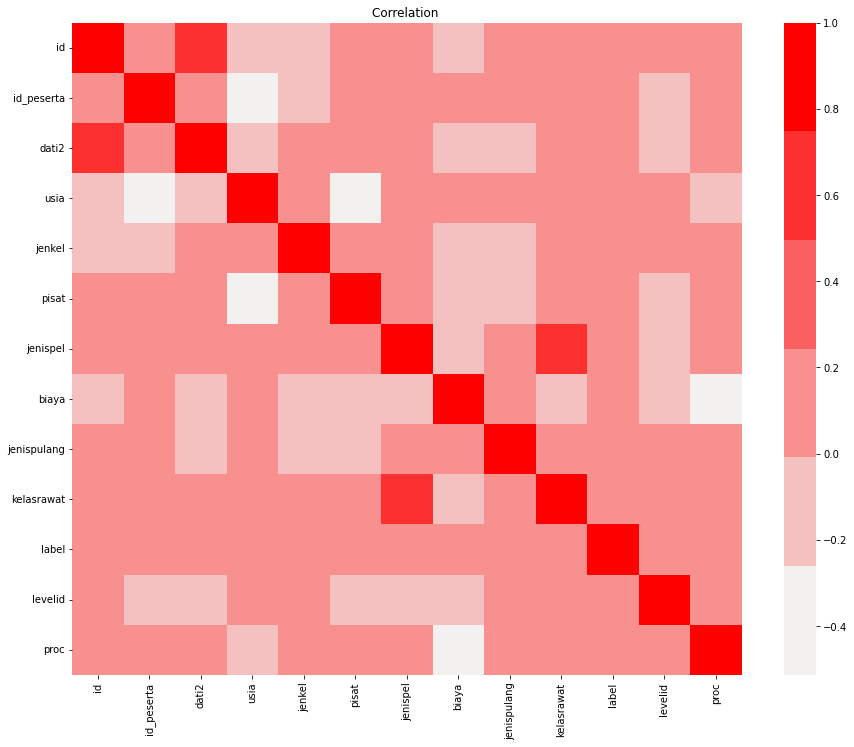

In [55]:
import seaborn as sns 
import matplotlib.pyplot as plt 
corr=sampling.corr()
fig = plt.figure(figsize=(15,12))
warna = sns.light_palette("red")
r = sns.heatmap(corr, cmap=warna)
r.set_title("Correlation ")

## Modeling

## Evaluation